## Soal UTS II3150 No 3
#### Bryan Eagan 18220041

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy import fft


In [17]:
#Konversi RGB menjadi komponen Y
img_ori_grey =cv2.imread('Foto_18220041_Bryan Eagan.jpg',0)
img_float = img_ori_grey.astype('float')
img_float

array([[196., 201., 201., ..., 215., 204., 235.],
       [201., 202., 202., ..., 228., 206., 205.],
       [200., 199., 201., ..., 239., 221., 195.],
       ...,
       [ 17.,  16.,  18., ..., 165., 165., 163.],
       [ 15.,  15.,  16., ..., 137., 141., 141.],
       [ 15.,  16.,  15., ..., 119., 120., 120.]])

In [18]:
#Mengambil bagian kecil dari komponen gambar dan membaginya menjadi macroblock 8x8 pixel
makroblok = []
for i in range (90,98):
    makroblok.append(img_float[i][0:8])
makroblok = np.array(makroblok)
before = np.array (makroblok)
makroblok

array([[202., 188., 180., 190., 207., 220., 224., 222.],
       [210., 187., 175., 193., 217., 224., 222., 225.],
       [209., 196., 188., 199., 215., 221., 223., 226.],
       [200., 205., 206., 203., 205., 216., 224., 224.],
       [200., 212., 220., 210., 200., 210., 222., 222.],
       [208., 217., 226., 218., 202., 204., 218., 221.],
       [216., 220., 227., 228., 218., 206., 201., 200.],
       [225., 226., 226., 225., 224., 215., 197., 181.]])

#### Proses Kompresi

In [19]:
#Nilai warna dikurangi 128 
makroblok -= 128
makroblok

array([[ 74.,  60.,  52.,  62.,  79.,  92.,  96.,  94.],
       [ 82.,  59.,  47.,  65.,  89.,  96.,  94.,  97.],
       [ 81.,  68.,  60.,  71.,  87.,  93.,  95.,  98.],
       [ 72.,  77.,  78.,  75.,  77.,  88.,  96.,  96.],
       [ 72.,  84.,  92.,  82.,  72.,  82.,  94.,  94.],
       [ 80.,  89.,  98.,  90.,  74.,  76.,  90.,  93.],
       [ 88.,  92.,  99., 100.,  90.,  78.,  73.,  72.],
       [ 97.,  98.,  98.,  97.,  96.,  87.,  69.,  53.]])

In [20]:
#Nilai warna dihitung dengan rumus DCT
img_dct = fft.dct(makroblok)
img_dct

array([[ 1.21800000e+03, -1.50175913e+02,  5.90738971e+01,
         7.81399290e+01,  1.27279221e+01,  4.51653829e+00,
        -1.50820343e+00, -9.73425554e-01],
       [ 1.25800000e+03, -1.51436650e+02,  5.38476453e+01,
         1.11496563e+02,  5.23259018e+01, -7.04153031e+00,
         6.56580968e-01, -1.36912190e+00],
       [ 1.30600000e+03, -1.21156584e+02,  4.64566090e+01,
         6.47749865e+01,  2.96984848e+01, -5.40997163e+00,
        -2.40488649e+00, -1.24143805e-01],
       [ 1.31800000e+03, -9.05653047e+01,  3.49217131e+01,
        -1.06591226e+01, -2.68700577e+01,  3.37478458e+00,
        -6.88443619e-01, -9.58917726e-01],
       [ 1.34400000e+03, -4.47707335e+01,  2.52345762e+01,
        -6.34099668e+01, -4.52548340e+01,  1.57018140e+01,
         1.79336612e+00, -4.58882870e-01],
       [ 1.38000000e+03,  3.52462404e+00,  2.04566659e+01,
        -8.21608291e+01, -2.26274170e+01,  2.27077463e+01,
        -2.35049354e+00,  1.23832606e+00],
       [ 1.38400000e+03,  9.021673

In [21]:
#Inisiasi tabel kuantisasi
tabel_kuantisasi = np.matrix('16 11 10 16 24 40 51 61;\
 12 12 14 19 26 58 60 55;\
 14 13 16 24 40 57 69 56;\
 14 17 22 29 51 87 80 62;\
 18 22 37 56 68 109 103 77;\
 24 35 55 64 81 104 103 92;\
 49 64 78 77 103 121 120 101;\
 72 92 95 98 112 100 103 99').astype('float')
tabel_kuantisasi = np.array(tabel_kuantisasi.tolist())
tabel_kuantisasi

array([[ 16.,  11.,  10.,  16.,  24.,  40.,  51.,  61.],
       [ 12.,  12.,  14.,  19.,  26.,  58.,  60.,  55.],
       [ 14.,  13.,  16.,  24.,  40.,  57.,  69.,  56.],
       [ 14.,  17.,  22.,  29.,  51.,  87.,  80.,  62.],
       [ 18.,  22.,  37.,  56.,  68., 109., 103.,  77.],
       [ 24.,  35.,  55.,  64.,  81., 104., 103.,  92.],
       [ 49.,  64.,  78.,  77., 103., 121., 120., 101.],
       [ 72.,  92.,  95.,  98., 112., 100., 103.,  99.]])

In [22]:
#Nilai warna dibagi dengan nilai pada tabel kuantisasi dan dibulatkan
for i in range (8) :
    for j in range (8) :
        img_dct[i][j] = round(img_dct[i][j]/tabel_kuantisasi[i][j])
img_dct

array([[ 76., -14.,   6.,   5.,   1.,   0.,   0.,   0.],
       [105., -13.,   4.,   6.,   2.,   0.,   0.,   0.],
       [ 93.,  -9.,   3.,   3.,   1.,   0.,   0.,   0.],
       [ 94.,  -5.,   2.,   0.,  -1.,   0.,   0.,   0.],
       [ 75.,  -2.,   1.,  -1.,  -1.,   0.,   0.,   0.],
       [ 58.,   0.,   0.,  -1.,   0.,   0.,   0.,   0.],
       [ 28.,   1.,  -1.,   0.,   0.,   0.,   0.,   0.],
       [ 19.,   2.,  -1.,   0.,   0.,   0.,   0.,   0.]])

#### Proses Dekompresi

In [23]:
#Nilai warna dikalikan dengan tabel kuantisasi
img_idct = img_dct
for i in range (8) :
    for j in range (8) :
        img_idct[i][j] = img_dct[i][j]*tabel_kuantisasi[i][j]
img_idct

array([[1216., -154.,   60.,   80.,   24.,    0.,    0.,    0.],
       [1260., -156.,   56.,  114.,   52.,    0.,    0.,    0.],
       [1302., -117.,   48.,   72.,   40.,    0.,    0.,    0.],
       [1316.,  -85.,   44.,    0.,  -51.,    0.,    0.,    0.],
       [1350.,  -44.,   37.,  -56.,  -68.,    0.,    0.,    0.],
       [1392.,    0.,    0.,  -64.,    0.,    0.,    0.,    0.],
       [1372.,   64.,  -78.,    0.,    0.,    0.,    0.,    0.],
       [1368.,  184.,  -95.,    0.,    0.,    0.,    0.,    0.]])

In [24]:
#Nilai warna dihitung dengan rumus Invers DCT dan dibulatkan
img_idct = fft.idct(img_dct)
for i in range (8) :
    for j in range (8) :
        img_idct[i][j] = round(img_idct[i][j])
img_idct

array([[ 74.,  59.,  51.,  62.,  81.,  92.,  95.,  96.],
       [ 83.,  58.,  47.,  65.,  89.,  96.,  96.,  97.],
       [ 84.,  66.,  59.,  72.,  87.,  92.,  94.,  97.],
       [ 72.,  80.,  79.,  71.,  75.,  91.,  98.,  93.],
       [ 71.,  89.,  92.,  77.,  71.,  85.,  95.,  94.],
       [ 80.,  89.,  95.,  91.,  83.,  79.,  85.,  94.],
       [ 85.,  89.,  94.,  96.,  93.,  85.,  75.,  69.],
       [ 97., 100., 103., 101.,  92.,  77.,  62.,  52.]])

In [25]:
#Nilai warna ditambahkan dengan nilai 128
img_idct += 128
after = img_idct
img_idct

array([[202., 187., 179., 190., 209., 220., 223., 224.],
       [211., 186., 175., 193., 217., 224., 224., 225.],
       [212., 194., 187., 200., 215., 220., 222., 225.],
       [200., 208., 207., 199., 203., 219., 226., 221.],
       [199., 217., 220., 205., 199., 213., 223., 222.],
       [208., 217., 223., 219., 211., 207., 213., 222.],
       [213., 217., 222., 224., 221., 213., 203., 197.],
       [225., 228., 231., 229., 220., 205., 190., 180.]])

In [26]:
#Unduh image sebelum dan sesudah kompresi
cv2.imwrite('img_before.jpg', before)
cv2.imwrite('img_after.jpg', after)

True

In [27]:
before

array([[202., 188., 180., 190., 207., 220., 224., 222.],
       [210., 187., 175., 193., 217., 224., 222., 225.],
       [209., 196., 188., 199., 215., 221., 223., 226.],
       [200., 205., 206., 203., 205., 216., 224., 224.],
       [200., 212., 220., 210., 200., 210., 222., 222.],
       [208., 217., 226., 218., 202., 204., 218., 221.],
       [216., 220., 227., 228., 218., 206., 201., 200.],
       [225., 226., 226., 225., 224., 215., 197., 181.]])

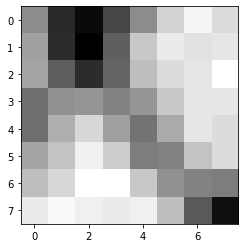

In [28]:
img_before = mpimg.imread('img_before.jpg')
plot_before = plt.imshow(img_before, cmap="gray")
plt.show()

In [ ]:
after

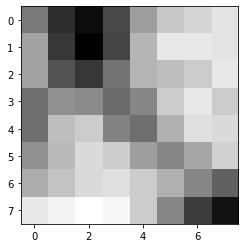

In [29]:
img_after = mpimg.imread('img_after.jpg')
plot_after = plt.imshow(img_after, cmap="gray")
plt.show()